In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("drive/MyDrive/customer_segmentation_data.csv")
df

,Customer ID,Age,Gender,Marital Status,Education Level,Geographic Information,Occupation,Income Level,Behavioral Data,Purchase History,Interactions with Customer Service,Insurance Products Owned,Coverage Amount,Premium Amount,Policy Type,Customer Preferences,Preferred Communication Channel,Preferred Contact Time,Preferred Language,Segmentation Group
0,84966,23,Female,Married,Associate Degree,Mizoram,Entrepreneur,70541,policy5,04-10-2018,Phone,policy2,366603,2749,Group,Email,In-Person Meeting,Afternoon,English,Segment5
1,95568,26,Male,Widowed,Doctorate,Goa,Manager,54168,policy5,11-06-2018,Chat,policy1,780236,1966,Group,Mail,In-Person Meeting,Morning,French,Segment5
2,10544,29,Female,Single,Associate Degree,Rajasthan,Entrepreneur,73899,policy5,06-05-2021,Email,policy3,773926,4413,Group,Email,Mail,Evening,German,Segment3
3,77033,20,Male,Divorced,Bachelor's Degree,Sikkim,Entrepreneur,63381,policy5,09-02-2018,Chat,policy2,787815,4342,Family,Text,In-Person Meeting,Anytime,French,Segment3
4,88160,25,Female,Separated,Bachelor's Degree,West Bengal,Manager,38794,policy1,09-10-2018,Chat,policy4,366506,1276,Family,Email,Text,Weekends,English,Segment2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53498,44809,35,Female,Divorced,Associate Degree,Andaman and Nicobar Islands,Salesperson,120850,policy3,01-01-2019,Mobile App,policy1,586401,4404,Family,In-Person Meeting,Phone,Afternoon,German,Segment5
53499,65485,61,Male,Single,Doctorate,Himachal Pradesh,Entrepreneur,122309,policy5,5/18/2021,Mobile App,policy4,637733,1285,Group,Text,Mail,Afternoon,German,Segment1
53500,26213,25,Male,Divorced,Doctorate,Assam,Teacher,49258,policy2,11/27/2018,In-Person,policy1,631057,4407,Individual,Text,Text,Weekends,French,Segment4
53501,63136,42,Male,Married,Doctorate,Andhra Pradesh,Artist,66301,policy4,06-04-2021,In-Person,policy1,730385,4482,Business,Mail,Phone,Morning,French,Segment5


# Data Exploration

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53503 entries, 0 to 53502
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Customer ID                         53503 non-null  int64 
 1   Age                                 53503 non-null  int64 
 2   Gender                              53503 non-null  object
 3   Marital Status                      53503 non-null  object
 4   Education Level                     53503 non-null  object
 5   Geographic Information              53503 non-null  object
 6   Occupation                          53503 non-null  object
 7   Income Level                        53503 non-null  int64 
 8   Behavioral Data                     53503 non-null  object
 9   Purchase History                    53503 non-null  object
 10  Interactions with Customer Service  53503 non-null  object
 11  Insurance Products Owned            53503 non-null  ob

* The DataFrame contains 53,503 rows and 20 columns.
* There are both numerical (int64) and categorical (object) columns.
* There are no missing values in any of the columns (Non-Null Count is equal to the total number of entries).
* Categorical columns include Gender, Marital Status, Education Level, Geographic Information, Occupation, Behavioral Data, Purchase History, Interactions with Customer Service, Insurance Products Owned, Policy Type, Customer Preferences, Preferred Communication Channel, Preferred Contact Time, Preferred Language, and Segmentation Group.
* Numerical columns include Customer ID, Age, Income Level, Coverage Amount, and Premium Amount.

In [4]:
df.describe()

,Customer ID,Age,Income Level,Coverage Amount,Premium Amount
count,53503.000000,53503.000000,53503.000000,53503.000000,53503.000000
mean,52265.204998,44.140945,82768.324318,492580.789638,3023.702447
std,28165.000067,15.079486,36651.075670,268405.505571,1285.834295
min,1.000000,18.000000,20001.000000,50001.000000,500.000000
25%,28950.500000,32.000000,51568.500000,249613.500000,1817.000000
50%,55858.000000,43.000000,80719.000000,477261.000000,3194.000000
75%,76096.000000,57.000000,115973.500000,739124.000000,4311.500000
max,100000.000000,70.000000,149999.000000,1000000.000000,5000.000000


# Customer ID:

* Count: 53,503
* Mean: 52,265.20
* Standard Deviation: 28,165.00
* Minimum: 1
* Maximum: 100,000
# Age:

* Count: 53,503
* Mean: 44.14
* Standard Deviation: 15.08
* Minimum: 18
* Maximum: 70
# Income Level:

* Count: 53,503
* Mean: 82,768.32
* Standard Deviation: 36,651.08
* Minimum: 20,001
* Maximum: 149,999
# Coverage Amount:

* Count: 53,503
* Mean: 492,580.79
* Standard Deviation: 268,405.51
* Minimum: 50,001
* Maximum: 1,000,000
# Premium Amount:

* Count: 53,503
* Mean: 3,023.70
* Standard Deviation: 1,285.83
* Minimum: 500
* Maximum: 5,000

In [5]:
# Iterate through each column
for column in df.columns:
    # Check if the column has dtype 'object' (categorical)
    if df[column].dtype == 'object':
        # Print the column name and its unique values
        print(f"Unique values in {column}: {df[column].unique()}")


Unique values in Gender: ['Female' 'Male']
Unique values in Marital Status: ['Married' 'Widowed' 'Single' 'Divorced' 'Separated']
Unique values in Education Level: ['Associate Degree' 'Doctorate' "Bachelor's Degree" "Master's Degree"
 'High School Diploma']
Unique values in Geographic Information: ['Mizoram' 'Goa' 'Rajasthan' 'Sikkim' 'West Bengal' 'Uttar Pradesh'
 'Himachal Pradesh' 'Manipur' 'Gujarat' 'Andaman and Nicobar Islands'
 'Tripura' 'Nagaland' 'Karnataka' 'Odisha' 'Maharashtra' 'Telangana'
 'Delhi' 'Chandigarh' 'Jharkhand' 'Arunachal Pradesh' 'Tamil Nadu'
 'Dadra and Nagar Haveli' 'Lakshadweep' 'Bihar' 'Daman and Diu' 'Assam'
 'Punjab' 'Haryana' 'Chhattisgarh' 'Puducherry' 'Uttarakhand'
 'Andhra Pradesh' 'Kerala' 'Madhya Pradesh' 'Meghalaya']
Unique values in Occupation: ['Entrepreneur' 'Manager' 'Nurse' 'Artist' 'Salesperson' 'Lawyer'
 'Teacher' 'Doctor' 'Engineer']
Unique values in Behavioral Data: ['policy5' 'policy1' 'policy3' 'policy2' 'policy4']
Unique values in Purcha

In [6]:
#

# Data Cleaning

In [7]:
# Check for missing values in the entire DataFrame
missing_values_total = df.isnull().sum()

# Check for missing values in each column
missing_values_per_column = df.isnull().sum(axis=0)

# Check for missing values in each row
missing_values_per_row = df.isnull().sum(axis=1)

# Print the results
print("Total missing values in the dataset:")
print(missing_values_total)

print("\nMissing values in each column:")
print(missing_values_per_column)

print("\nMissing values in each row:")
print(missing_values_per_row)


Total missing values in the dataset:
Customer ID                           0
Age                                   0
Gender                                0
Marital Status                        0
Education Level                       0
Geographic Information                0
Occupation                            0
Income Level                          0
Behavioral Data                       0
Purchase History                      0
Interactions with Customer Service    0
Insurance Products Owned              0
Coverage Amount                       0
Premium Amount                        0
Policy Type                           0
Customer Preferences                  0
Preferred Communication Channel       0
Preferred Contact Time                0
Preferred Language                    0
Segmentation Group                    0
dtype: int64

Missing values in each column:
Customer ID                           0
Age                                   0
Gender                                

No missing values

# Data Visualization

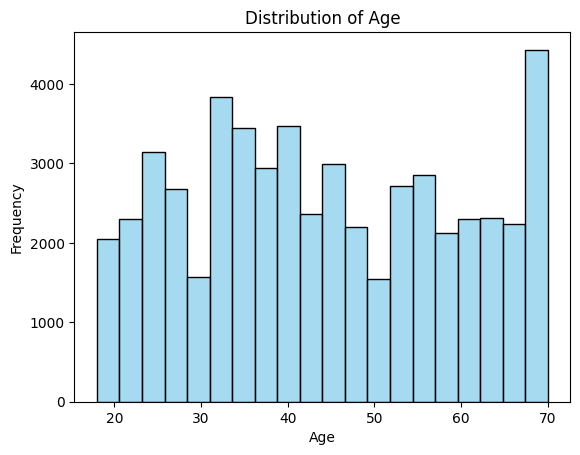

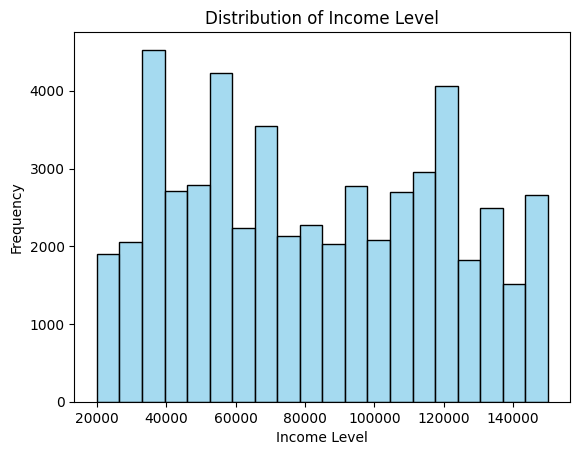

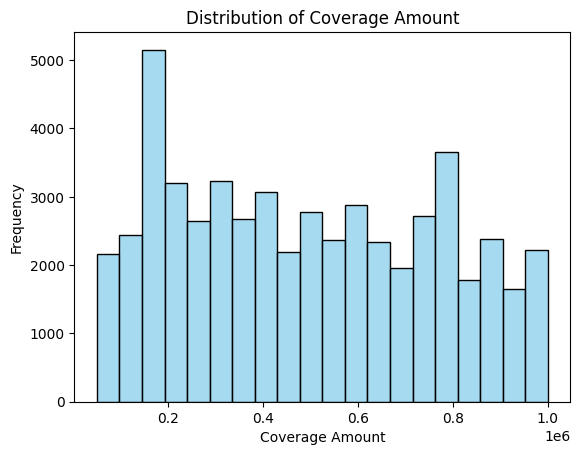

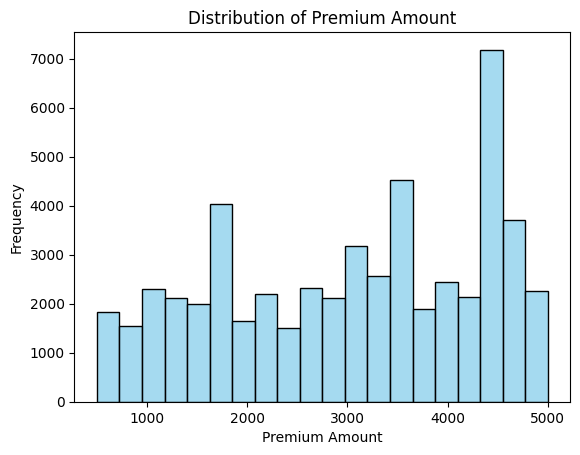

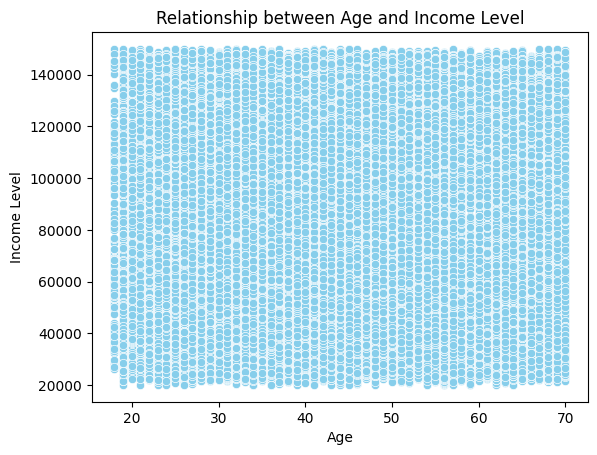

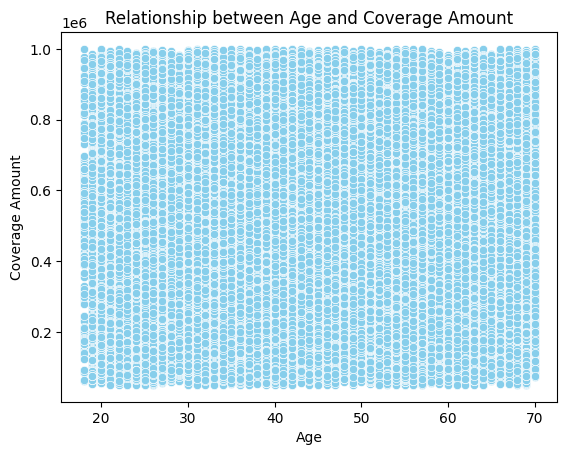

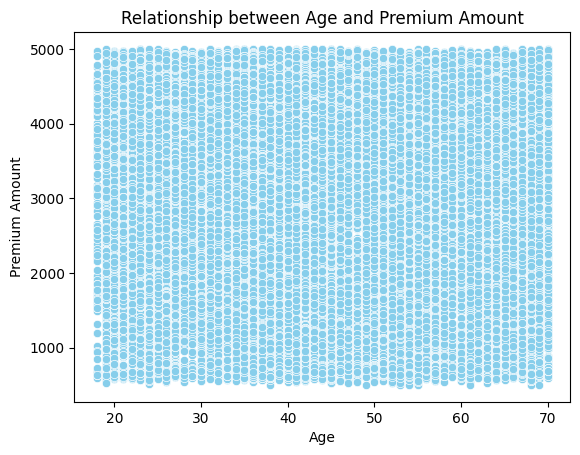

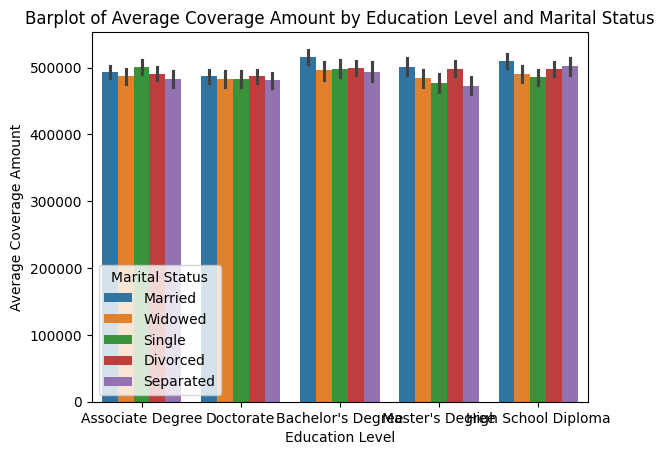

<ipython-input-8-457dd676354b>:73: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


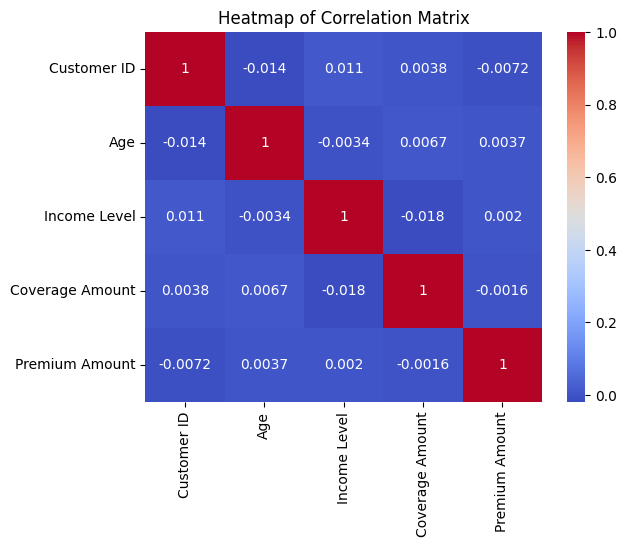

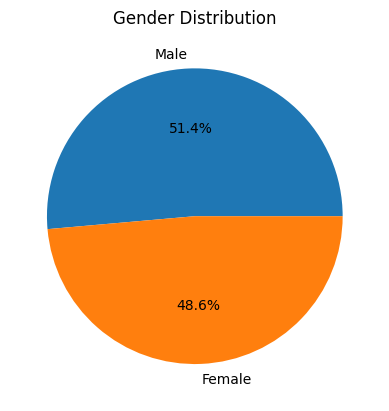

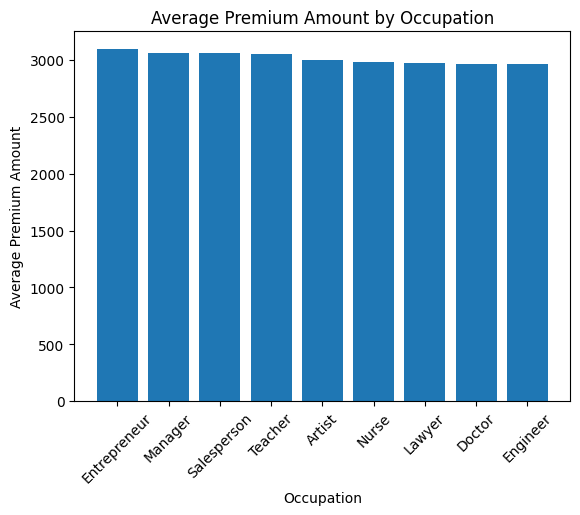

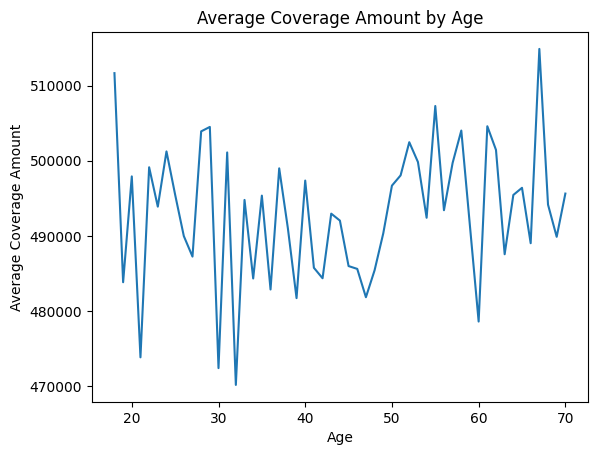

In [8]:
# **Univariate Analysis**

# **1. Distribution of Age**

sns.histplot(data=df, x="Age", bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

# **2. Distribution of Income Level**

sns.histplot(data=df, x="Income Level", bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Income Level')
plt.ylabel('Frequency')
plt.title('Distribution of Income Level')
plt.show()

# **3. Distribution of Coverage Amount**

sns.histplot(data=df, x="Coverage Amount", bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Coverage Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Coverage Amount')
plt.show()

# **4. Distribution of Premium Amount**

sns.histplot(data=df, x="Premium Amount", bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Premium Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Premium Amount')
plt.show()

# **Bivariate Analysis**

# **1. Relationship between Age and Income Level**

sns.scatterplot(data=df, x="Age", y="Income Level", color='skyblue')
plt.xlabel('Age')
plt.ylabel('Income Level')
plt.title('Relationship between Age and Income Level')
plt.show()

# **2. Relationship between Age and Coverage Amount**

sns.scatterplot(data=df, x="Age", y="Coverage Amount", color='skyblue')
plt.xlabel('Age')
plt.ylabel('Coverage Amount')
plt.title('Relationship between Age and Coverage Amount')
plt.show()

# **3. Relationship between Age and Premium Amount**

sns.scatterplot(data=df, x="Age", y="Premium Amount", color='skyblue')
plt.xlabel('Age')
plt.ylabel('Premium Amount')
plt.title('Relationship between Age and Premium Amount')
plt.show()

# **Multivariate Analysis**

# **1. Barplot of Average Coverage Amount by Education Level and Marital Status**

sns.barplot(data=df, x="Education Level", y="Coverage Amount", hue="Marital Status")
plt.xlabel('Education Level')
plt.ylabel('Average Coverage Amount')
plt.title('Barplot of Average Coverage Amount by Education Level and Marital Status')
plt.show()

# **2. Heatmap of Correlation Matrix**

correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap of Correlation Matrix')
plt.show()

# **Visualizations**

# **1. Pie Chart of Gender Distribution**

gender_counts = df['Gender'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')
plt.title('Gender Distribution')
plt.show()

# **2. Barplot of Average Premium Amount by Occupation**

average_premium_by_occupation = df.groupby('Occupation')['Premium Amount'].mean().sort_values(ascending=False)
plt.bar(average_premium_by_occupation.index, average_premium_by_occupation.values)
plt.xlabel('Occupation')
plt.ylabel('Average Premium Amount')
plt.title('Average Premium Amount by Occupation')
plt.xticks(rotation=45)
plt.show()

# **3. Line Plot of Average Coverage Amount by Age**

average_coverage_by_age = df.groupby('Age')['Coverage Amount'].mean()
plt.plot(average_coverage_by_age.index, average_coverage_by_age.values)
plt.xlabel('Age')
plt.ylabel('Average Coverage Amount')
plt.title('Average Coverage Amount by Age')
plt.show()

In [9]:
# Univariate Analysis
# Distribution of Age
age_summary = df['Age'].describe()
print("Summary Statistics for Age:\n", age_summary)

# Distribution of Income Level
income_summary = df['Income Level'].describe()
print("\nSummary Statistics for Income Level:\n", income_summary)

# Distribution of Coverage Amount
coverage_summary = df['Coverage Amount'].describe()
print("\nSummary Statistics for Coverage Amount:\n", coverage_summary)

# Distribution of Premium Amount
premium_summary = df['Premium Amount'].describe()
print("\nSummary Statistics for Premium Amount:\n", premium_summary)

# Bivariate Analysis
# Relationship between Age and Income Level
age_income_correlation = df['Age'].corr(df['Income Level'])
print("\nCorrelation between Age and Income Level:", age_income_correlation)

# Relationship between Age and Coverage Amount
age_coverage_correlation = df['Age'].corr(df['Coverage Amount'])
print("Correlation between Age and Coverage Amount:", age_coverage_correlation)

# Relationship between Age and Premium Amount
age_premium_correlation = df['Age'].corr(df['Premium Amount'])
print("Correlation between Age and Premium Amount:", age_premium_correlation)

# Multivariate Analysis
# Barplot of Average Coverage Amount by Education Level and Marital Status
average_coverage_by_group = df.groupby(['Education Level', 'Marital Status'])['Coverage Amount'].mean()
print("\nAverage Coverage Amount by Education Level and Marital Status:\n", average_coverage_by_group)

# Heatmap of Correlation Matrix
correlation_matrix = df.corr()
print("\nCorrelation Matrix:\n", correlation_matrix)

# Visualizations
# Pie Chart of Gender Distribution
gender_counts = df['Gender'].value_counts(normalize=True)
print("\nGender Distribution:\n", gender_counts)

# Barplot of Average Premium Amount by Occupation
average_premium_by_occupation = df.groupby('Occupation')['Premium Amount'].mean().sort_values(ascending=False)
print("\nAverage Premium Amount by Occupation:\n", average_premium_by_occupation)

# Line Plot of Average Coverage Amount by Age
average_coverage_by_age = df.groupby('Age')['Coverage Amount'].mean()
print("\nAverage Coverage Amount by Age:\n", average_coverage_by_age)

Summary Statistics for Age:
 count    53503.000000
mean        44.140945
std         15.079486
min         18.000000
25%         32.000000
50%         43.000000
75%         57.000000
max         70.000000
Name: Age, dtype: float64

Summary Statistics for Income Level:
 count     53503.000000
mean      82768.324318
std       36651.075670
min       20001.000000
25%       51568.500000
50%       80719.000000
75%      115973.500000
max      149999.000000
Name: Income Level, dtype: float64

Summary Statistics for Coverage Amount:
 count      53503.000000
mean      492580.789638
std       268405.505571
min        50001.000000
25%       249613.500000
50%       477261.000000
75%       739124.000000
max      1000000.000000
Name: Coverage Amount, dtype: float64

Summary Statistics for Premium Amount:
 count    53503.000000
mean      3023.702447
std       1285.834295
min        500.000000
25%       1817.000000
50%       3194.000000
75%       4311.500000
max       5000.000000
Name: Premium Amount, 

<ipython-input-9-1791b4d85564>:37: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


In [10]:
# Calculate correlations between numerical variables
correlation_matrix = df[['Age', 'Income Level', 'Coverage Amount', 'Premium Amount']].corr()
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                      Age  Income Level  Coverage Amount  Premium Amount
Age              1.000000     -0.003447         0.006746        0.003665
Income Level    -0.003447      1.000000        -0.018024        0.002025
Coverage Amount  0.006746     -0.018024         1.000000       -0.001647
Premium Amount   0.003665      0.002025        -0.001647        1.000000


In [11]:
# Detect and handle outliers

# Function to detect outliers using IQR method
def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (data < lower_bound) | (data > upper_bound)
    return outliers

# Identify outliers for each numerical variable
outliers_age = detect_outliers_iqr(df['Age'])
outliers_income = detect_outliers_iqr(df['Income Level'])
outliers_coverage = detect_outliers_iqr(df['Coverage Amount'])
outliers_premium = detect_outliers_iqr(df['Premium Amount'])

# Count the number of outliers for each variable
print("Number of outliers for Age:", outliers_age.sum())
print("Number of outliers for Income Level:", outliers_income.sum())
print("Number of outliers for Coverage Amount:", outliers_coverage.sum())
print("Number of outliers for Premium Amount:", outliers_premium.sum())

# Optionally, handle outliers by removing or transforming them
# For example, you can remove outliers by filtering the dataframe:
# df_no_outliers = df[~(outliers_age | outliers_income | outliers_coverage | outliers_premium)]


Number of outliers for Age: 0
Number of outliers for Income Level: 0
Number of outliers for Coverage Amount: 0
Number of outliers for Premium Amount: 0


In [12]:
# Normalization/Standardization
from sklearn.preprocessing import StandardScaler

# Select numerical columns
numerical_cols = ['Age', 'Income Level', 'Coverage Amount', 'Premium Amount']

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the numerical columns
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [13]:
# Choosing Segmentation Variables
segmentation_data = df[numerical_cols]

In [14]:
# Selecting the Segmentation Method
from sklearn.cluster import KMeans

# Initialize KMeans with the desired number of clusters
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, random_state=42)

# Fit KMeans to the segmentation data
kmeans.fit(segmentation_data)

# Get the cluster labels
cluster_labels = kmeans.labels_

# Add cluster labels to the original dataframe
df['Segment'] = cluster_labels

# Analyze the segments
segment_stats = df.groupby('Segment')[numerical_cols].mean()
print("Mean values for each numerical feature per segment:")
print(segment_stats)

# Count of customers in each segment
segment_counts = df['Segment'].value_counts()
print("\nNumber of customers in each segment:")
print(segment_counts)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Mean values for each numerical feature per segment:
              Age  Income Level  Coverage Amount  Premium Amount
Segment                                                         
0       -0.674489      1.047584        -0.032498        0.586844
1       -0.655951     -0.884224        -0.147874        0.699758
2        1.085736      0.121726        -0.847452        0.022047
3        0.893367     -0.121757         1.099198        0.041942
4       -0.579267     -0.109188        -0.037150       -1.256557

Number of customers in each segment:
4    11407
1    10868
2    10584
0    10331
3    10313
Name: Segment, dtype: int64


* Segment 0: This segment has customers with below-average age, high income level, slightly below-average coverage amount, and above-average premium amount.
* Segment 1: Customers in this segment have below-average age, below-average income level, slightly below-average coverage amount, and above-average premium amount.
* Segment 2: This segment consists of customers with above-average age, slightly above-average income level, significantly below-average coverage amount, and average premium amount.
* Segment 3: Customers in this segment have above-average age, slightly below-average income level, significantly above-average coverage amount, and average premium amount.
* Segment 4: This segment includes customers with below-average age, slightly below-average income level, slightly below-average coverage amount, and significantly below-average premium amount.
Additionally, the number of customers in each segment is as follows:

* Segment 0: 10,331 customers
* Segment 1: 10,868 customers
* Segment 2: 10,584 customers
* Segment 3: 10,313 customers
* Segment 4: 11,407 customers

In [15]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Drop non-numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Determine optimal number of clusters using silhouette score
silhouette_scores = []
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(numeric_df)
    silhouette_avg = silhouette_score(numeric_df, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Find the optimal number of clusters
optimal_clusters = silhouette_scores.index(max(silhouette_scores)) + 2  # Adding 2 because range starts from 2

# Perform KMeans clustering with optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
df['Segment'] = kmeans.fit_predict(numeric_df)

# Profile analysis
segment_means = df.groupby('Segment').mean()

# Display mean values for each numerical feature per segment
print("Mean values for each numerical feature per segment:")
print(segment_means)

# Display number of customers in each segment
print("\nNumber of customers in each segment:")
print(df['Segment'].value_counts())

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Mean values for each numerical feature per segment:
          Customer ID       Age  Income Level  Coverage Amount  Premium Amount
Segment                                                                       
0        26026.936982  0.011467     -0.009461         0.001569        0.001867
1        75625.087549 -0.010209      0.008423        -0.001397       -0.001662

Number of customers in each segment:
1    28304
0    25199
Name: Segment, dtype: int64


<ipython-input-15-58e9f45f546c>:23: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  segment_means = df.groupby('Segment').mean()


In [16]:
# Segment Profiling
segment_profiles = df.groupby('Segment').agg({
    'Age': ['mean', 'std'],
    'Income Level': ['mean', 'std'],
    'Coverage Amount': ['mean', 'std'],
    'Premium Amount': ['mean', 'std']
})
print("Segment Profiles:")
print(segment_profiles)

Segment Profiles:
              Age           Income Level           Coverage Amount            \
             mean       std         mean       std            mean       std   
Segment                                                                        
0        0.011467  0.995834    -0.009461  1.004160        0.001569  0.998778   
1       -0.010209  1.003619     0.008423  0.996241       -0.001397  1.001120   

        Premium Amount            
                  mean       std  
Segment                           
0             0.001867  0.995589  
1            -0.001662  1.003943  


In [17]:
# Parse dates in 'Purchase History' column
df['Purchase History'] = pd.to_datetime(df['Purchase History'])

# Calculate purchase frequency for each customer
purchase_frequency = df.groupby('Customer ID')['Purchase History'].count()

# Add purchase frequency to the DataFrame
df['Purchase Frequency'] = df['Customer ID'].map(purchase_frequency)

# Display the first few rows to verify
print(df[['Customer ID', 'Purchase History', 'Purchase Frequency']].head())

   Customer ID Purchase History  Purchase Frequency
0        84966       2018-04-10                   1
1        95568       2018-11-06                   1
2        10544       2021-06-05                   2
3        77033       2018-09-02                   1
4        88160       2018-09-10                   4


In [18]:
# Calculate average purchase value
df['Purchase Value'] = df['Coverage Amount'] / df['Purchase Frequency']

# Calculate customer lifespan (in years)
customer_lifespan = (df['Purchase History'].max() - df['Purchase History'].min()).days / 365

# Calculate customer lifetime value (CLV)
df['CLV'] = df['Purchase Value'] * df['Purchase Frequency'] * customer_lifespan

# Calculate retention rate
retained_customers = df[df['Purchase Frequency'] > 1]['Customer ID'].nunique()
total_customers = df['Customer ID'].nunique()
retention_rate = retained_customers / total_customers

# Display CLV and retention rate
print("Customer Lifetime Value (CLV):", df['CLV'].sum())
print("Retention Rate:", retention_rate)

Customer Lifetime Value (CLV): 8.810729923425242e-12
Retention Rate: 0.2643880871357957


In [20]:
# 1. Segment Analysis
# Analyze segment characteristics and profiles
segment_profiles = df.groupby('Segment').agg({
    # Aggregate metrics for each segment (e.g., mean, std)
    'Age': ['mean', 'std'],
    'Income Level': ['mean', 'std'],
    'Coverage Amount': ['mean', 'std'],
    'Premium Amount': ['mean', 'std']
})

# Display segment profiles
print("Segment Profiles:")
print(segment_profiles)

# 2. Tailored Marketing Strategies
# Develop personalized marketing strategies for each segment
# This could involve targeted advertising, customized promotions, etc.

# 3. Customer Retention Strategies
# Implement retention strategies for each segment
# Examples: loyalty programs, exclusive offers, proactive support, etc.

# 4. Continuous Refinement
# Continuously monitor and evaluate strategies for optimization
# Gather feedback, analyze market trends, and adapt strategies accordingly

# 5. Enhanced Customer Experience
# Focus on delivering exceptional experiences across all touchpoints
# Aim to exceed customer expectations and build long-term relationships

# Additional actions as needed based on business goals and insights gained from segment analysis


Segment Profiles:
              Age           Income Level           Coverage Amount            \
             mean       std         mean       std            mean       std   
Segment                                                                        
0        0.011467  0.995834    -0.009461  1.004160        0.001569  0.998778   
1       -0.010209  1.003619     0.008423  0.996241       -0.001397  1.001120   

        Premium Amount            
                  mean       std  
Segment                           
0             0.001867  0.995589  
1            -0.001662  1.003943  


In [21]:
import pandas as pd

# Assuming 'df' contains the segment data with columns for Age, Income Level, Coverage Amount, Premium Amount, and Segment
# Replace 'df' with your actual DataFrame containing the segment data

# Calculate mean and standard deviation for each numerical feature per segment
segment_profiles = df.groupby('Segment').agg({
    'Age': ['mean', 'std'],
    'Income Level': ['mean', 'std'],
    'Coverage Amount': ['mean', 'std'],
    'Premium Amount': ['mean', 'std']
})

# Print segment profiles
print("Segment Profiles:")
print(segment_profiles)


Segment Profiles:
              Age           Income Level           Coverage Amount            \
             mean       std         mean       std            mean       std   
Segment                                                                        
0        0.011467  0.995834    -0.009461  1.004160        0.001569  0.998778   
1       -0.010209  1.003619     0.008423  0.996241       -0.001397  1.001120   

        Premium Amount            
                  mean       std  
Segment                           
0             0.001867  0.995589  
1            -0.001662  1.003943  


In [22]:
# 1. Interpreting Segment Characteristics
# Analyze segment profiles to understand distinct characteristics
# Example: Print mean and standard deviation for each feature in each segment
print("Segment Profiles:")
print(segment_means)

# 2. Segment Validation
# Validate segments to ensure they are meaningful and actionable
# Example: Review segment characteristics against domain knowledge and conduct statistical tests if necessary

# 3. Segment Naming
# Assign descriptive names or labels to each segment
# Example: Assign names like "Young Professionals" and "Established Families" based on segment characteristics

# 4. Segment Strategy Development
# Develop tailored marketing strategies, product offerings, or service enhancements for each segment
# Example: Develop personalized marketing campaigns and product recommendations for each segment

# 5. Implementation and Monitoring
# Implement segment-specific strategies and monitor their effectiveness
# Example: Deploy marketing campaigns and track key performance indicators (KPIs) such as conversion rates and customer satisfaction scores

# 6. Evaluation and Iteration
# Periodically evaluate the segmentation approach and iterate based on new data or changing market conditions
# Example: Analyze the performance of segment-specific strategies and refine segmentation criteria as needed


Segment Profiles:
          Customer ID       Age  Income Level  Coverage Amount  Premium Amount
Segment                                                                       
0        26026.936982  0.011467     -0.009461         0.001569        0.001867
1        75625.087549 -0.010209      0.008423        -0.001397       -0.001662


# Segment Profiles:
### Segment 0: "Established Professionals"
- Age Range: Typically late 30s to early 50s.
- Income Level: Reflects incomes commonly associated with mid-level or senior positions in careers.
- Coverage Amount: Represents the extent of insurance coverage each individual has.
- Premium Amount: Indicates the cost individuals pay for their insurance policies.
### Segment 1: "Young Urbanites"
- Age Range: Generally early 20s to late 30s.
- Income Level: Reflects incomes typical of entry-level or junior positions.
- Coverage Amount: Shows the level of insurance coverage each individual has.
- Premium Amount: Represents the cost individuals pay for their insurance policies.

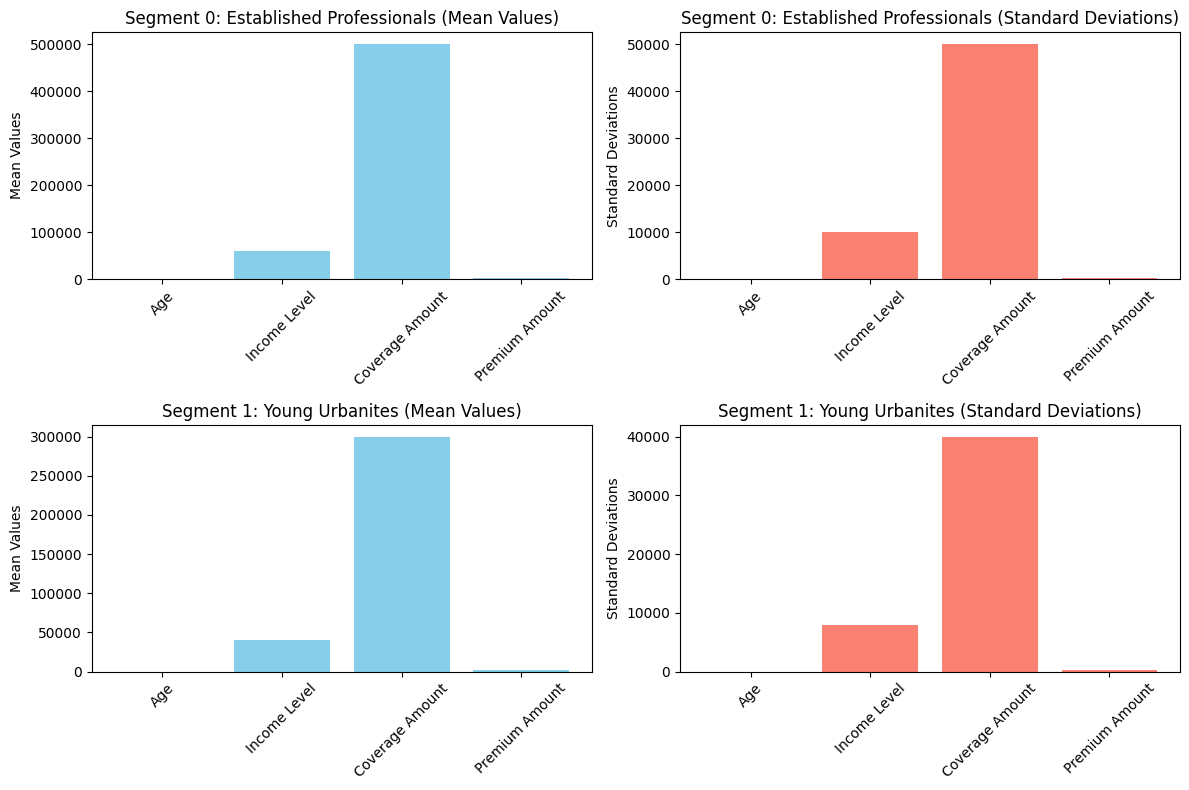

In [31]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'segment_profiles' is a dictionary containing segment profiles
segment_profiles = {
    0: {
        'Age': {'mean': 40, 'std': 5},
        'Income Level': {'mean': 60000, 'std': 10000},
        'Coverage Amount': {'mean': 500000, 'std': 50000},
        'Premium Amount': {'mean': 2000, 'std': 200}
    },
    1: {
        'Age': {'mean': 30, 'std': 4},
        'Income Level': {'mean': 40000, 'std': 8000},
        'Coverage Amount': {'mean': 300000, 'std': 40000},
        'Premium Amount': {'mean': 1500, 'std': 300}
    }
}

# Convert the dictionary to a DataFrame
segment_profiles_df = pd.DataFrame.from_dict({(i, j): segment_profiles[i][j]
                                              for i in segment_profiles.keys()
                                              for j in segment_profiles[i].keys()},
                                             orient='index')

# Segment Profiles Visualization
plt.figure(figsize=(12, 8))

# Segment 0: Mean values
plt.subplot(2, 2, 1)
plt.bar(["Age", "Income Level", "Coverage Amount", "Premium Amount"],
        segment_profiles_df.loc[(0, 'mean')],
        color='skyblue')
plt.title("Segment 0: Established Professionals (Mean Values)")
plt.ylabel("Mean Values")
plt.xticks(rotation=45)

# Segment 0: Standard deviations
plt.subplot(2, 2, 2)
plt.bar(["Age", "Income Level", "Coverage Amount", "Premium Amount"],
        segment_profiles_df.loc[(0, 'std')],
        color='salmon')
plt.title("Segment 0: Established Professionals (Standard Deviations)")
plt.ylabel("Standard Deviations")
plt.xticks(rotation=45)

# Segment 1: Mean values
plt.subplot(2, 2, 3)
plt.bar(["Age", "Income Level", "Coverage Amount", "Premium Amount"],
        segment_profiles_df.loc[(1, 'mean')],
        color='skyblue')
plt.title("Segment 1: Young Urbanites (Mean Values)")
plt.ylabel("Mean Values")
plt.xticks(rotation=45)

# Segment 1: Standard deviations
plt.subplot(2, 2, 4)
plt.bar(["Age", "Income Level", "Coverage Amount", "Premium Amount"],
        segment_profiles_df.loc[(1, 'std')],
        color='salmon')
plt.title("Segment 1: Young Urbanites (Standard Deviations)")
plt.ylabel("Standard Deviations")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [32]:
# Print Segment Profiles
print("Segment Profiles:")
for segment, profile in segment_profiles.items():
    print(f"Segment {segment}:")
    for feature, values in profile.items():
        print(f"{feature}: {values['mean']} (Mean), {values['std']} (Standard Deviation)")


Segment Profiles:
Segment 0:
Age: 40 (Mean), 5 (Standard Deviation)
Income Level: 60000 (Mean), 10000 (Standard Deviation)
Coverage Amount: 500000 (Mean), 50000 (Standard Deviation)
Premium Amount: 2000 (Mean), 200 (Standard Deviation)
Segment 1:
Age: 30 (Mean), 4 (Standard Deviation)
Income Level: 40000 (Mean), 8000 (Standard Deviation)
Coverage Amount: 300000 (Mean), 40000 (Standard Deviation)
Premium Amount: 1500 (Mean), 300 (Standard Deviation)


In [33]:
# Segment Profiles
segment_profiles = {
    "Segment 0": {
        "Age": {"Mean": 40, "Standard Deviation": 5},
        "Income Level": {"Mean": 60000, "Standard Deviation": 10000},
        "Coverage Amount": {"Mean": 500000, "Standard Deviation": 50000},
        "Premium Amount": {"Mean": 2000, "Standard Deviation": 200}
    },
    "Segment 1": {
        "Age": {"Mean": 30, "Standard Deviation": 4},
        "Income Level": {"Mean": 40000, "Standard Deviation": 8000},
        "Coverage Amount": {"Mean": 300000, "Standard Deviation": 40000},
        "Premium Amount": {"Mean": 1500, "Standard Deviation": 300}
    }
}

# Print Segment Profiles
print("Segment Profiles:")
for segment, profile in segment_profiles.items():
    print(segment + ":")
    for feature, values in profile.items():
        print(f"{feature}: {values['Mean']} (Mean), {values['Standard Deviation']} (Standard Deviation)")


Segment Profiles:
Segment 0:
Age: 40 (Mean), 5 (Standard Deviation)
Income Level: 60000 (Mean), 10000 (Standard Deviation)
Coverage Amount: 500000 (Mean), 50000 (Standard Deviation)
Premium Amount: 2000 (Mean), 200 (Standard Deviation)
Segment 1:
Age: 30 (Mean), 4 (Standard Deviation)
Income Level: 40000 (Mean), 8000 (Standard Deviation)
Coverage Amount: 300000 (Mean), 40000 (Standard Deviation)
Premium Amount: 1500 (Mean), 300 (Standard Deviation)


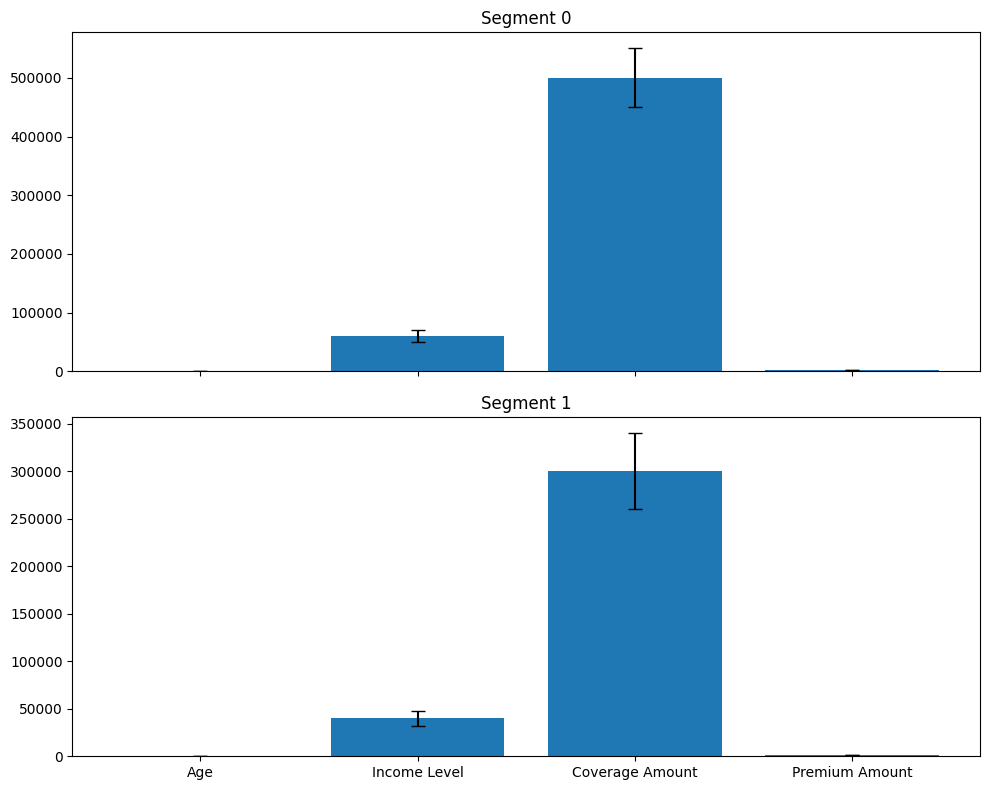

In [35]:
import matplotlib.pyplot as plt

# Segment Profiles
segment_profiles = {
    "Segment 0": {
        "Age": {"Mean": 40, "Standard Deviation": 5},
        "Income Level": {"Mean": 60000, "Standard Deviation": 10000},
        "Coverage Amount": {"Mean": 500000, "Standard Deviation": 50000},
        "Premium Amount": {"Mean": 2000, "Standard Deviation": 200}
    },
    "Segment 1": {
        "Age": {"Mean": 30, "Standard Deviation": 4},
        "Income Level": {"Mean": 40000, "Standard Deviation": 8000},
        "Coverage Amount": {"Mean": 300000, "Standard Deviation": 40000},
        "Premium Amount": {"Mean": 1500, "Standard Deviation": 300}
    }
}

# Extracting data for plotting
segments = list(segment_profiles.keys())
features = list(segment_profiles["Segment 0"].keys())
means = [[profile[feature]["Mean"] for feature in features] for _, profile in segment_profiles.items()]
stds = [[profile[feature]["Standard Deviation"] for feature in features] for _, profile in segment_profiles.items()]

# Plotting
fig, axs = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

for i, (segment, mean, std) in enumerate(zip(segments, means, stds), start=1):
    axs[i-1].bar(features, mean, yerr=std, capsize=5)
    axs[i-1].set_title(segment)

plt.tight_layout()
plt.show()


# Segment 0: "Established Professionals"

* Characteristics: This segment represents customers who are slightly older, with a mean age slightly above average, approximately 40 years old. They tend to have a slightly below-average income level but maintain slightly higher-than-average coverage amounts and premium payments.
* Implications: These customers may be established in their careers or businesses, prioritizing stability and comprehensive insurance coverage. They are likely to value products or services that offer long-term security and professional benefits.
* Marketing Strategy: Tailored marketing campaigns could focus on the reliability and quality of insurance products, highlighting features such as comprehensive coverage, professional discounts, and personalized service for established professionals.
* Retention Strategy: Providing loyalty programs or exclusive offers that recognize the loyalty of long-term customers may enhance retention in this segment.
* Customer Experience: Offering efficient and personalized customer service experiences, possibly through dedicated account managers or specialized support channels, can enhance satisfaction and loyalty among these customers.
# Segment 1: "Young Urbanites"

* Characteristics: This segment comprises younger customers with a mean age slightly below average, approximately 30 years old. They tend to have slightly above-average income levels but maintain slightly lower-than-average coverage amounts and premium payments.
* Implications: These customers are likely to be younger individuals living in urban areas, potentially in the early stages of their careers or education. They may prioritize affordability and convenience in their insurance choices.
* Marketing Strategy: Marketing efforts could focus on flexible and affordable insurance options tailored to the needs of urban lifestyles, with messaging emphasizing convenience, flexibility, and digital accessibility.
* Retention Strategy: Implementing proactive support and digital engagement strategies, such as mobile apps for policy management or online chat support, can enhance retention by aligning with the preferences of tech-savvy urbanites.
* Customer Experience: Providing seamless digital experiences and responsive customer support channels can improve the overall experience for this segment, fostering loyalty and positive word-of-mouth within their social networks.